In [10]:
import os
import librosa
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc

import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [11]:
working_OS = 'Windows'

if working_OS == 'MacOS':
    os.chdir(r"/Users/jordanlee/Code/School/CSCI416/music-genre-classification")
    print("Current Working Directory:", os.getcwd())

elif working_OS == 'Windows':
    os.chdir(r"C:\Code\School\CSCI416\music_genre_classification\music-genre-classification")
    print("Current Working Directory:", os.getcwd())

Current Working Directory: C:\Code\School\CSCI416\music_genre_classification\music-genre-classification


# Raw Data Test

In [12]:
# Load the CSV
data_path = 'data/features/augmented_features.csv'
df = pd.read_csv(data_path)

# Strip brackets and convert to float where applicable
for col in df.columns:
    if df[col].dtype == 'object':  # Check if the column is a string
        try:
            df[col] = df[col].str.strip('[]').astype(float)  # Remove brackets and convert to float
        except ValueError:
            print(f"Skipping column '{col}' as it contains non-numeric data.")

# Save the cleaned data back to CSV (optional)
df.to_csv('data/features/aug_features_cleaned.csv', index=False)

Skipping column 'label' as it contains non-numeric data.


In [13]:
df = pd.read_csv('data/features/aug_features_cleaned.csv')

print(df.head())

   length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0  661794          0.349243         0.090267  0.062099  0.000633   
1  661794          0.360839         0.089537  0.088020  0.001352   
2  661794          0.353408         0.087590  0.087666  0.001255   
3  661794          0.361252         0.096059  0.042711  0.000534   
4  661794          0.326704         0.094482  0.061822  0.001287   

   spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0             2356.361371          151470.019714              2624.635908   
1             1765.876937          111147.466502              1975.900817   
2             1878.023359          119200.788352              2153.267158   
3             1217.412221          239451.204091              1633.883795   
4             1466.379089          422281.761120              1965.039549   

   spectral_bandwidth_var  rolloff_mean  ...  mfcc16_var  mfcc17_mean  \
0            64750.644732   5287.300666  ...   44.90742

In [14]:
X = df.drop(columns=['label'])
y = df['label']

In [15]:
label_encoder =LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

In [18]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [20]:
joblib.dump(rf_model, 'models/random_forest_model.joblib')
joblib.dump(svm_model, 'models/svm_model.joblib')

['models/svm_model.joblib']

In [21]:
y_pred_rf = rf_model.predict(X_test)
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.84      0.63      0.72        73
           1       0.93      0.93      0.93        69
           2       0.65      0.76      0.70        58
           3       0.73      0.69      0.71        59
           4       0.71      0.70      0.70        53
           5       0.65      0.84      0.74        51
           6       0.83      0.89      0.86        56
           7       0.77      0.88      0.82        57
           8       0.77      0.76      0.77        58
           9       0.81      0.64      0.71        66

    accuracy                           0.77       600
   macro avg       0.77      0.77      0.77       600
weighted avg       0.78      0.77      0.77       600

Accuracy: 0.7683333333333333


In [22]:
y_pred_svm = svm_model.predict(X_test)
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.79      0.63      0.70        73
           1       0.90      0.94      0.92        69
           2       0.67      0.72      0.69        58
           3       0.54      0.59      0.56        59
           4       0.78      0.72      0.75        53
           5       0.80      0.86      0.83        51
           6       0.74      0.86      0.79        56
           7       0.77      0.72      0.75        57
           8       0.80      0.71      0.75        58
           9       0.49      0.52      0.50        66

    accuracy                           0.72       600
   macro avg       0.73      0.73      0.73       600
weighted avg       0.73      0.72      0.72       600

Accuracy: 0.7233333333333334


In [23]:
label_names = sorted(df['label'].unique())

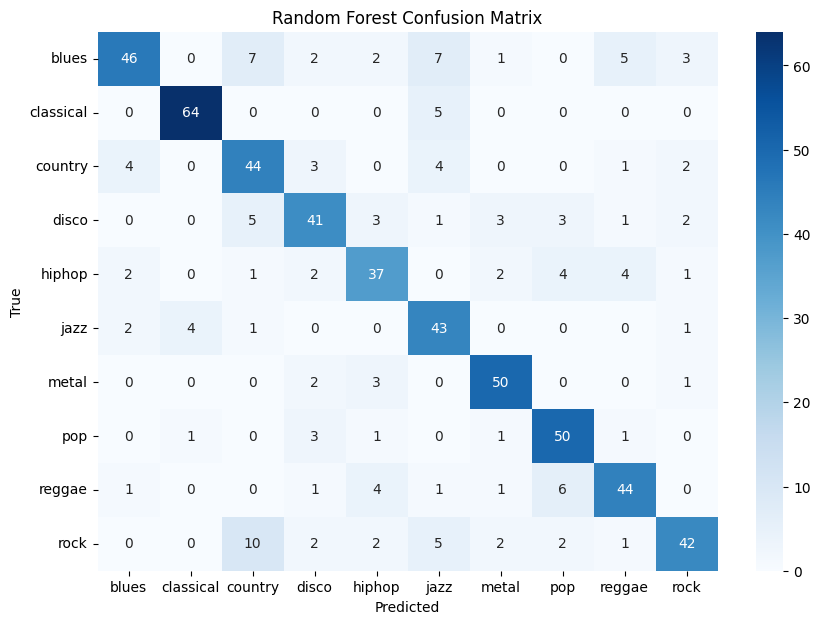

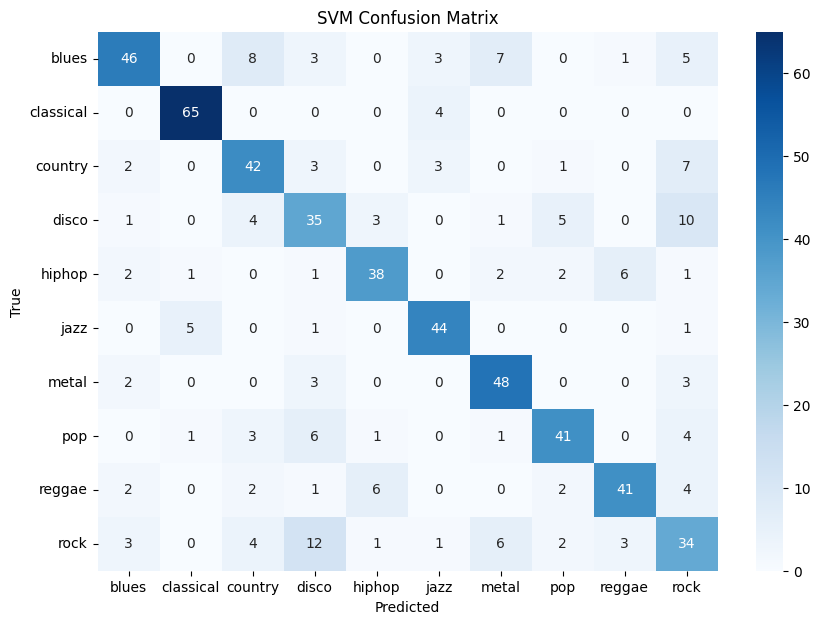

In [24]:
y_pred_rf = rf_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)

# Generate confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix using Seaborn heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Generate confusion matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plot confusion matrix for SVM
plt.figure(figsize=(10, 7))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

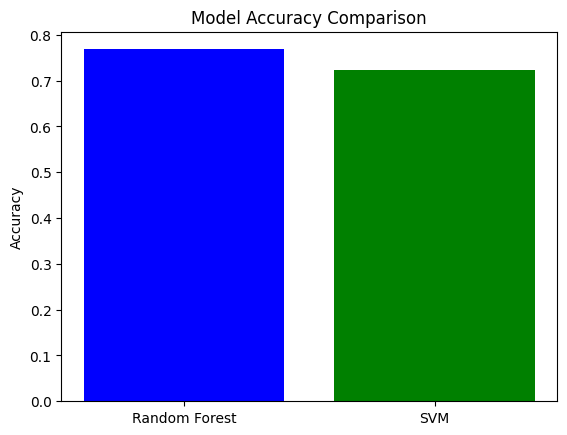

In [25]:
# Calculate accuracy for each model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Create a bar plot for comparison
models = ['Random Forest', 'SVM']
accuracies = [accuracy_rf, accuracy_svm]

plt.bar(models, accuracies, color=['blue', 'green'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()

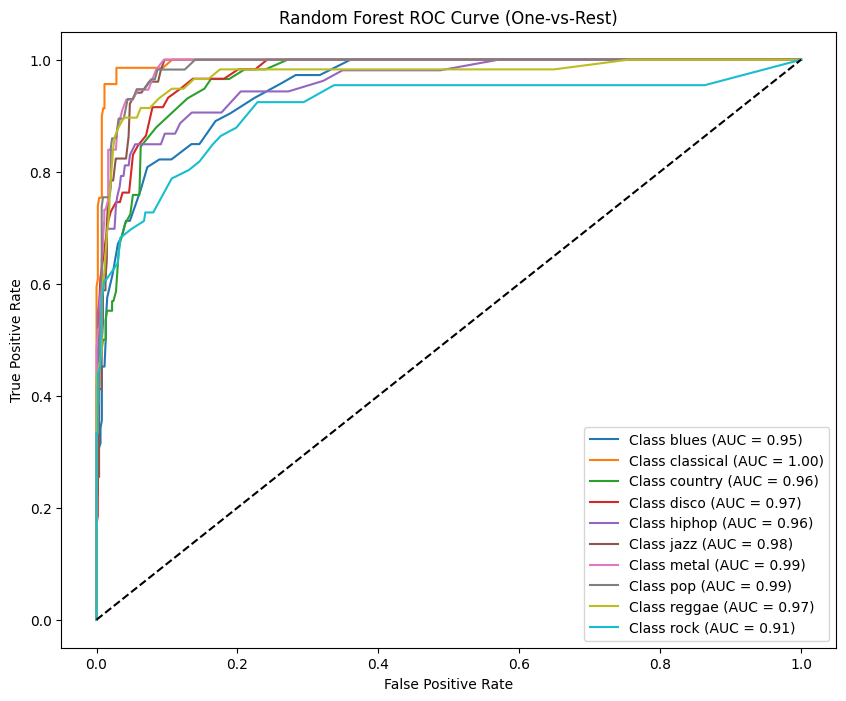

In [26]:
# For Random Forest
n_classes = len(label_names)  # Number of classes (genres)
y_score_rf = rf_model.predict_proba(X_test)  # Get probabilities for each class

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test == i, y_score_rf[:, i])  # One-vs-Rest
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {label_names[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve (One-vs-Rest)')
plt.legend(loc='best')
plt.show()

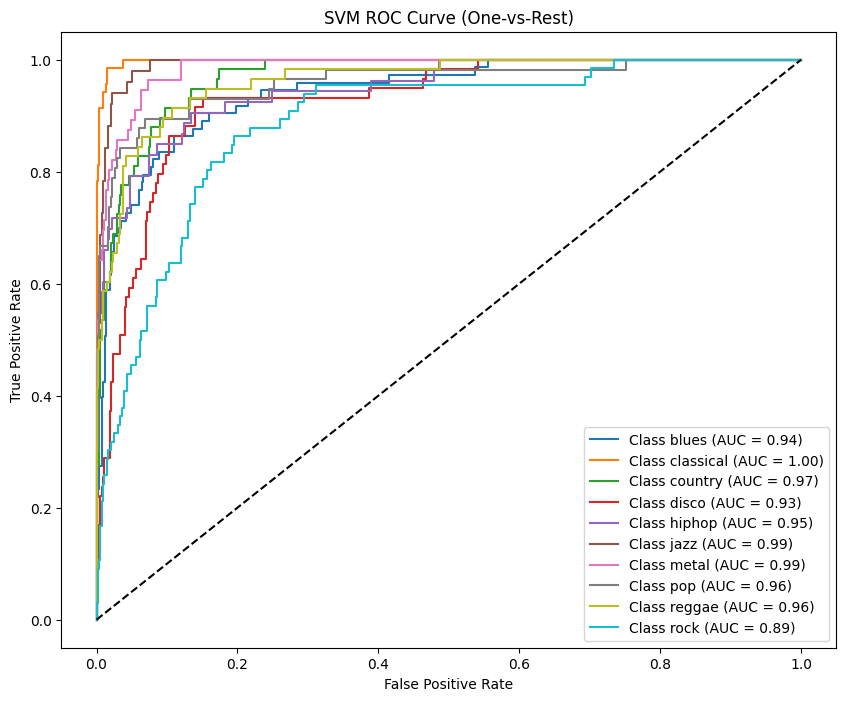

In [27]:
# For SVM
y_score_svm = svm_model.predict_proba(X_test)  # Get probabilities for each class

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test == i, y_score_svm[:, i])  # One-vs-Rest
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {label_names[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve (One-vs-Rest)')
plt.legend(loc='best')
plt.show()

In [28]:
# Cross-validation for Random Forest
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=5)
print("Random Forest CV Scores:", cv_scores_rf)

# Cross-validation for SVM
cv_scores_svm = cross_val_score(svm_model, X_train, y_train, cv=5)
print("SVM CV Scores:", cv_scores_svm)

Random Forest CV Scores: [0.71458333 0.77291667 0.7954071  0.75574113 0.74947808]
SVM CV Scores: [0.69166667 0.7375     0.73903967 0.7223382  0.70772443]


NameError: name 'X_raw' is not defined

<Figure size 1200x600 with 0 Axes>